In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir(r'/content/drive/My Drive/Project_A_Supp')  # Change the directory to torchRay-master folder

# Requirements

In [3]:
import os
import numpy as np
import pandas as pd
import requests
import scipy
import pickle
from scipy.ndimage.filters import gaussian_filter
from scipy.interpolate import interp1d
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras import regularizers
import keras.backend as K
from keras.models import load_model
from tensorflow.core.util import event_pb2
from tensorflow.python.lib.io import tf_record
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import cv2

In [4]:
from mnist1d_utils import *

# Dataset

In [5]:
dataset = make_dataset()

**Dataset:** A dictionary conaining 4000 train and 1000 test data.

Keys of the dictionary:

* 'x' : Training data.

* 'y' : Training labels.

* 'x_test' : Test data.

* 'y_test : Test labels.

* 't' : Mapping data points to spatial locations.

* 'templates' : The templates for the digits 0-9.

Text(0.5, 1.0, 'predicted class: 6')

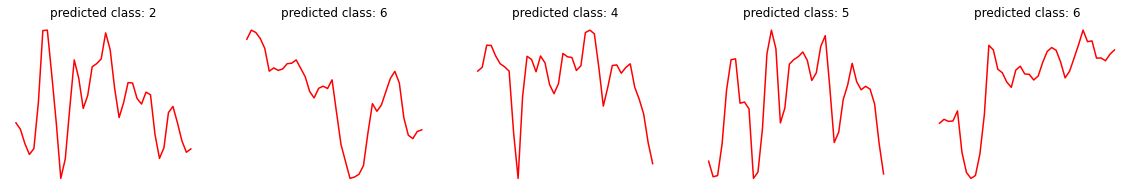

In [6]:
#@title Show some examples from the MNIST 1-D dataset

plt.figure(figsize=(20,3))

plt.subplot(151)
plt.plot(dataset['x'][0], 'r')
plt.axis('off')
plt.title('predicted class: '+str(dataset['y'][0]))

plt.subplot(152)
plt.plot(dataset['x'][1], 'r')
plt.axis('off')
plt.title('predicted class: '+str(dataset['y'][1]))

plt.subplot(153)
plt.plot(dataset['x'][2], 'r')
plt.axis('off')
plt.title('predicted class: '+str(dataset['y'][2]))

plt.subplot(154)
plt.plot(dataset['x'][3], 'r')
plt.axis('off')
plt.title('predicted class: '+str(dataset['y'][3]))

plt.subplot(155)
plt.plot(dataset['x'][4], 'r')
plt.axis('off')
plt.title('predicted class: '+str(dataset['y'][4]))

Text(0.5, 1.0, 'predicted class: 9')

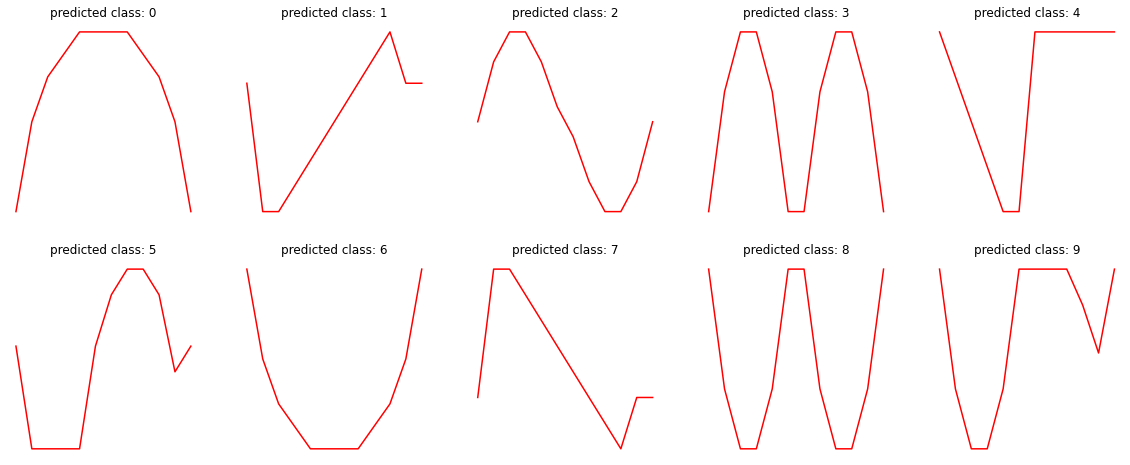

In [7]:
#@title Show the digit templates in the MNIST 1-D dataset 

plt.figure(figsize=(20,8))

plt.subplot(251)
plt.plot(dataset['templates']['x'][0], 'r')
plt.axis('off')
plt.title('predicted class: 0')

plt.subplot(252)
plt.plot(dataset['templates']['x'][1], 'r')
plt.axis('off')
plt.title('predicted class: 1')

plt.subplot(253)
plt.plot(dataset['templates']['x'][2], 'r')
plt.axis('off')
plt.title('predicted class: 2')

plt.subplot(254)
plt.plot(dataset['templates']['x'][3], 'r')
plt.axis('off')
plt.title('predicted class: 3')

plt.subplot(255)
plt.plot(dataset['templates']['x'][4], 'r')
plt.axis('off')
plt.title('predicted class: 4')

plt.subplot(256)
plt.plot(dataset['templates']['x'][5], 'r')
plt.axis('off')
plt.title('predicted class: 5')

plt.subplot(257)
plt.plot(dataset['templates']['x'][6], 'r')
plt.axis('off')
plt.title('predicted class: 6')

plt.subplot(258)
plt.plot(dataset['templates']['x'][7], 'r')
plt.axis('off')
plt.title('predicted class: 7')

plt.subplot(259)
plt.plot(dataset['templates']['x'][8], 'r')
plt.axis('off')
plt.title('predicted class: 8')

plt.subplot(2,5,10)
plt.plot(dataset['templates']['x'][9], 'r')
plt.axis('off')
plt.title('predicted class: 9')

Saving the dataset

In [8]:
f = open("MNIST1D.pkl","wb")
pickle.dump(dataset,f)
f.close()

# Model Creation

**Creating model :**

A 1-Dimensional CNN, containing 3 convolutional layers, followed by a fully-connected output layer.

In [9]:
##Task1-Question1
weight_decay = 5e-4
model = Sequential()
model.add(Conv1D(filters=25, kernel_size=5, padding="same", activation='relu', input_shape=(40,1), kernel_regularizer= regularizers.l2(weight_decay), bias_regularizer= regularizers.l2(weight_decay)))
model.add(Conv1D(filters=25, kernel_size=3, padding="same", activation='relu', kernel_regularizer= regularizers.l2(weight_decay), bias_regularizer= regularizers.l2(weight_decay)))
model.add(Conv1D(filters=25, kernel_size=3, padding="same", activation='relu', kernel_regularizer= regularizers.l2(weight_decay), bias_regularizer= regularizers.l2(weight_decay)))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_regularizer= regularizers.l2(weight_decay), bias_regularizer= regularizers.l2(weight_decay)))
model.summary()
##

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 25)            150       
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 25)            1900      
                                                                 
 conv1d_2 (Conv1D)           (None, 40, 25)            1900      
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 dense (Dense)               (None, 10)                10010     
                                                                 
Total params: 13,960
Trainable params: 13,960
Non-trainable params: 0
_________________________________________________________________


# Training the model

Compiling the model

Loss function: Cross-entropy

Optimizer: Stochastic Gradient Descent (SGD) (learning rate = 0.01)

Tensorboard: For recording the training procedure

In [10]:
##Task1-Question2
import datetime
model.compile(loss='categorical_crossentropy', optimizer= tensorflow.keras.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])
temp_train = tensorflow.one_hot(dataset['y'], 10)
temp_test = tensorflow.one_hot(dataset['y_test'], 10)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(dataset['x'], temp_train, epochs=200, batch_size=25, validation_data=(dataset['x_test'],temp_test), verbose=1, callbacks=[tensorboard_callback])
##

Epoch 1/200
160/160 [==============================] - 2s 7ms/step - loss: 2.3253 - accuracy: 0.1423 - val_loss: 2.2955 - val_accuracy: 0.1650
Epoch 2/200
160/160 [==============================] - 1s 6ms/step - loss: 2.2054 - accuracy: 0.1813 - val_loss: 2.0931 - val_accuracy: 0.2050
Epoch 3/200
160/160 [==============================] - 1s 5ms/step - loss: 1.9558 - accuracy: 0.2352 - val_loss: 1.8738 - val_accuracy: 0.2550
Epoch 4/200
160/160 [==============================] - 1s 5ms/step - loss: 1.8020 - accuracy: 0.2892 - val_loss: 1.7960 - val_accuracy: 0.2810
Epoch 5/200
160/160 [==============================] - 1s 5ms/step - loss: 1.7265 - accuracy: 0.3167 - val_loss: 1.7027 - val_accuracy: 0.3060
Epoch 6/200
160/160 [==============================] - 1s 5ms/step - loss: 1.6525 - accuracy: 0.3530 - val_loss: 1.6247 - val_accuracy: 0.3480
Epoch 7/200
160/160 [==============================] - 1s 5ms/step - loss: 1.5811 - accuracy: 0.3778 - val_loss: 1.5757 - val_accuracy: 0.3550

# Plotting the training progress

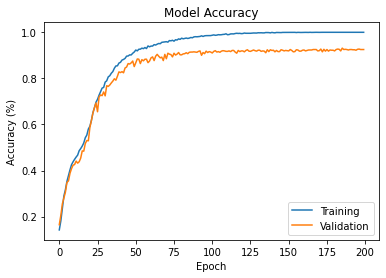

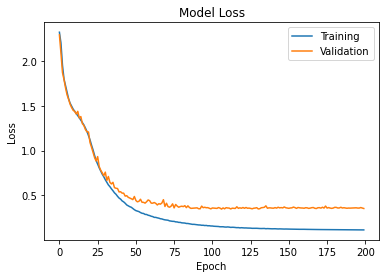

In [11]:
##Task1-Question3

#3.a plot of loss and accuracy
#Accuracy plot
plt.title('Model Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

#Loss plot
plt.title('Model Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [12]:
#3.b overall classification accuracy on test set
print('Overall Accuracy : ')
test_set = model.evaluate(dataset['x_test'],temp_test)


#Predictions for the test set to calculate the following metrics 
predict_set = model.predict(dataset['x_test'])

Overall Accuracy : 
32/32 [==============================] - 0s 3ms/step - loss: 0.3526 - accuracy: 0.9250



Class Accuracies: 
[1.         0.90384615 0.89772727 0.99056604 0.9245283  0.84693878
 0.94949495 0.89583333 0.96938776 0.8627451 ]


Text(0.5, 1.0, 'Accuracy per Class')

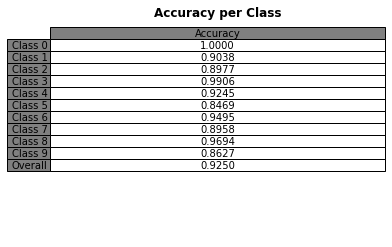

In [13]:
#3.c classwise classification accuracy
#track occurrences and correct classification, index of array will be the class integer
occurrences = np.zeros(10)
correct_classification = np.zeros(10)

for x in range(1,1000) :
  occurrences[dataset['y_test'][x]] += 1
  if dataset['y_test'][x] == int(tensorflow.argmax(predict_set[x], axis=0)):
    correct_classification[dataset['y_test'][x]] += 1

class_accuracy = np.divide(correct_classification, occurrences)
print('\nClass Accuracies: ')
print(class_accuracy)


labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Overall']

content = np.transpose(np.append(class_accuracy,test_set[1]))
content = [['%.4f' %i] for i in content]

fig, ax = plt.subplots()
ax.set_axis_off() 
table = ax.table( 
    cellText = content,  
    rowLabels = labels,  
    colLabels = ['Accuracy'], 
    rowColours =["grey"] * 11,  
    colColours =["grey"] * 2,
    cellLoc ='center',  
    loc ='upper center')         
ax.set_title('Accuracy per Class', 
             fontweight ="bold") 

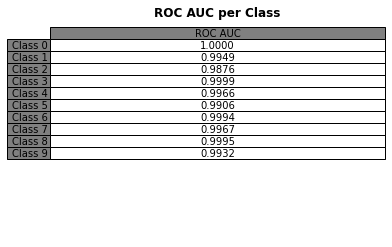

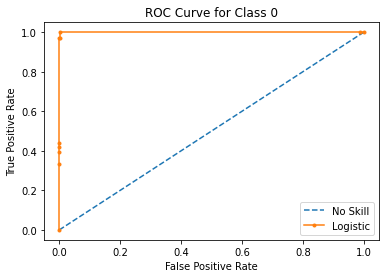

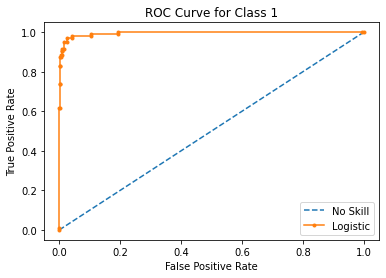

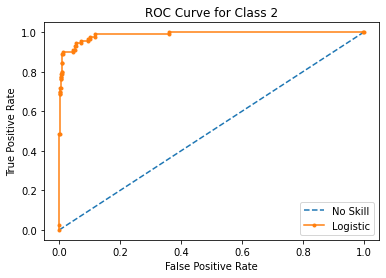

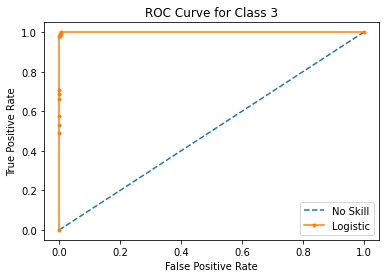

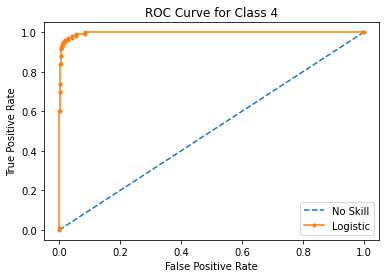

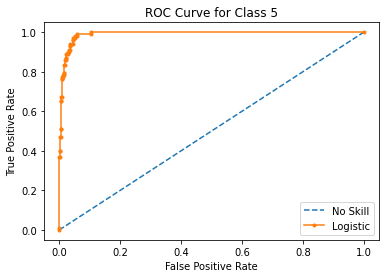

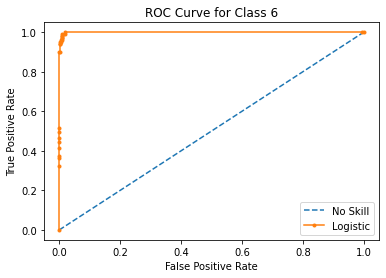

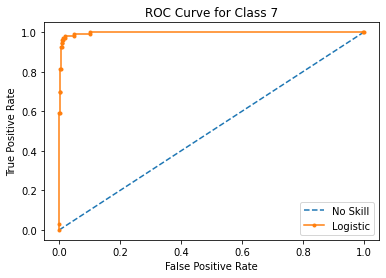

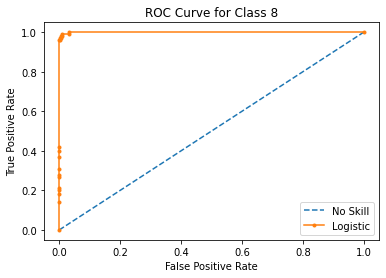

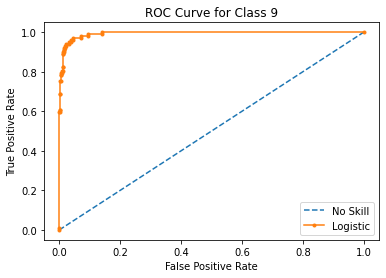

In [14]:
#3.d ROC and AUC curves
class_auc = np.zeros(10)
ns_auc = np.zeros(10)
ns_prob = np.zeros(1000)
for x in range(0,10):
  ns_auc[x] = metrics.roc_auc_score(temp_test[:,x], ns_prob)
  class_auc[x] = metrics.roc_auc_score(temp_test[:,x], predict_set[:,x])

labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']

content = np.transpose(class_auc)
content = [['%.4f' %i] for i in content]

fig, ax = plt.subplots()
ax.set_axis_off() 
table = ax.table( 
    cellText = content,  
    rowLabels = labels,  
    colLabels = ['ROC AUC'], 
    rowColours =["grey"] * 10,  
    colColours =["grey"] * 2, 
    cellLoc ='center',  
    loc ='upper center')         
ax.set_title('ROC AUC per Class', 
             fontweight ="bold") 

#calculate roc curves
fig, ax = plt.subplots()
for c in range(0,10):
  ns_fpr, ns_tpr, _ = metrics.roc_curve(temp_test[:,c], ns_prob)
  lr_fpr, lr_tpr, _ = metrics.roc_curve(temp_test[:,c], predict_set[:,c])
  # plot the roc curve for the model
  print('')
  plt.title('ROC Curve for Class %d' % c)
  plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  # axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  # show the legend
  plt.legend()
  # show the plot
  plt.show()

[[102   0   0   0   0   0   0   0   0   0]
 [  0  94   2   0   1   4   1   0   0   2]
 [  0   2  80   0   0   3   0   3   0   1]
 [  0   0   0 105   0   0   0   1   0   0]
 [  0   0   2   0  98   1   0   0   1   4]
 [  0   5   7   0   0  83   0   2   0   1]
 [  1   2   0   0   0   1  94   0   0   1]
 [  0   0   5   1   0   4   0  86   0   0]
 [  0   0   0   1   0   0   0   0  95   2]
 [  0   1   1   0   6   3   1   0   2  88]]


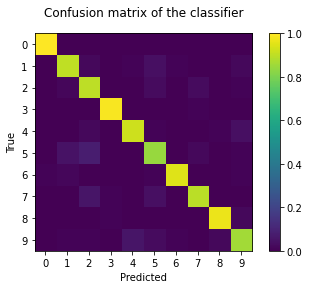

In [28]:
#3.e normalized confusion matrix
predict_set = model.predict(dataset['x_test'])
predict_set = predict_set.argmax(axis=1)
confusion_matrix = metrics.confusion_matrix(dataset['y_test'], predict_set)
print(confusion_matrix)
confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)
#plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion_matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
labels = [0,1,2,3,4,5,6,7,8,9]
ax.set_xticks(labels)
ax.set_yticks(labels)
ax.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Text(0.5, 1.0, 'Precision, Recall and F1 values per Class')

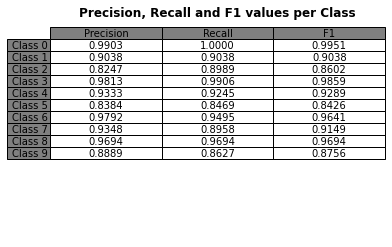

In [16]:
#3.f Precision, Recall, and F-1 score
#calculate precision, recall, and f1 scores
precision = metrics.precision_score(dataset['y_test'], predict_set,average=None)
recall = metrics.recall_score(dataset['y_test'], predict_set,average=None)
f1 = metrics.f1_score(dataset['y_test'], predict_set,average=None)

#plot
labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']

content = np.transpose([precision,recall,f1])
content = [['%.4f' % j for j in i] for i in content]

fig, ax = plt.subplots()
ax.set_axis_off() 
table = ax.table( 
    cellText = content,  
    rowLabels = labels,  
    colLabels = ['Precision','Recall','F1'], 
    rowColours =["grey"] * 10,  
    colColours =["grey"] * 3, 
    cellLoc ='center',  
    loc ='upper center')         
ax.set_title('Precision, Recall and F1 values per Class', 
             fontweight ="bold") 
##

# Explanation

In [17]:
from xai_utils import *

Take a test sample

In [18]:
x_test = dataset['x_test']
y_test = dataset['y_test']

Give the input to the model (Prediction)

In [19]:
index = 53
input = np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)
label = y_test[index]
print('Correct digit: '+str(label))
print('Predicted digit: '+str(np.argmax(model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy())))
print('Confidence score for the correct label: '+str(model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy()[0,label]))

Correct digit: 9
Predicted digit: 9
Confidence score for the correct label: 0.6309457


0
Correct digit: 2
Predicted digit: 2
Confidence score for the correct label: 0.9055142
1
Correct digit: 6
Predicted digit: 6
Confidence score for the correct label: 1.0
2
Correct digit: 3
Predicted digit: 3
Confidence score for the correct label: 1.0
3
Correct digit: 9
Predicted digit: 2
Confidence score for the correct label: 0.25412568
4
Correct digit: 4
Predicted digit: 4
Confidence score for the correct label: 0.71173495
5
Correct digit: 3
Predicted digit: 3
Confidence score for the correct label: 0.9999995
6
Correct digit: 1
Predicted digit: 1
Confidence score for the correct label: 0.86607397
7
Correct digit: 9
Predicted digit: 9
Confidence score for the correct label: 0.8265687
8
Correct digit: 5
Predicted digit: 5
Confidence score for the correct label: 0.99999475
9
Correct digit: 2
Predicted digit: 2
Confidence score for the correct label: 0.999765
10
Correct digit: 0
Predicted digit: 0
Confidence score for the correct label: 0.870426
11
Correct digit: 7
Predicted digit: 7
Co

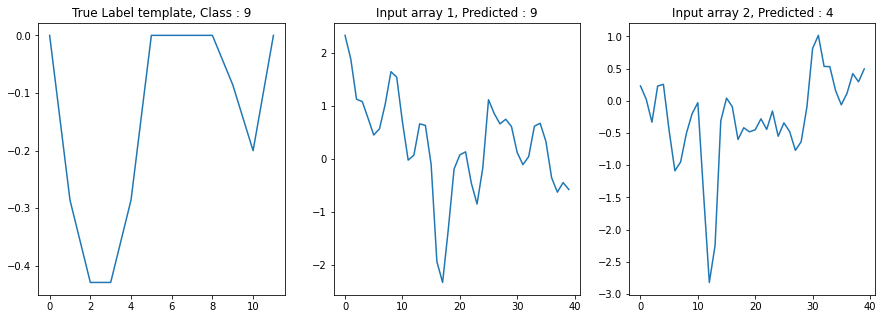

In [45]:
# plotting examples of classification
# Sample test set
prediction = []
index = 19
ind2 = 369

for y in range(1000):
  input = np.expand_dims(np.expand_dims(x_test[y], axis=0), axis=-1)
  label = y_test[y]
  print(y)
  print('Correct digit: '+str(label))
  print('Predicted digit: '+str(np.argmax(model(np.expand_dims(np.expand_dims(x_test[y], axis=0), axis=-1)).numpy())))
  print('Confidence score for the correct label: '+str(model(np.expand_dims(np.expand_dims(x_test[y], axis=0), axis=-1)).numpy()[0,label]))


plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(dataset['templates']['x'][y_test[index]])
plt.title('True Label template, Class : ' + str(y_test[index]))

plt.subplot(1,3,2)
plt.plot(x_test[index])
plt.title('Input array 1, Predicted : ' + str(np.argmax(model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy())))

plt.subplot(1,3,3)
plt.plot(x_test[ind2])
plt.title('Input array 2, Predicted : ' + str(np.argmax(model(np.expand_dims(np.expand_dims(x_test[ind2], axis=0), axis=-1)).numpy())))


print('Confidence score for the correct label: '+str(model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy()[0,y_test[index]]))
print('Confidence score for the correct label: '+str(model(np.expand_dims(np.expand_dims(x_test[ind2], axis=0), axis=-1)).numpy()[0,y_test[ind2]]))

## SISE (Semantic Input Sampling for Explanation)

In [21]:
explanation = SISE(input, model, label, [['conv1d_2']], grad_thr=0.)

Text(0.5, 1.0, 'Highlighted input region (by the SISE algorithm)')

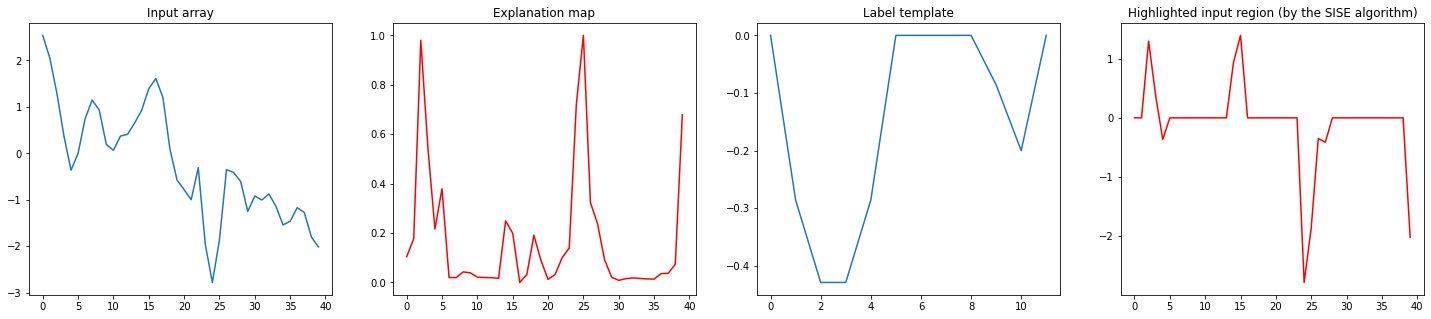

In [22]:
threshold = np.sort(explanation[:,0])[-12]

plt.figure(figsize=(25,5))

plt.subplot(1,4,1)
plt.plot(input[0])
plt.title('Input array')

plt.subplot(1,4,2)
plt.plot(explanation, 'r')
plt.title('Explanation map')

plt.subplot(1,4,3)
plt.plot(dataset['templates']['x'][label])
plt.title('Label template')

plt.subplot(1,4,4)
plt.plot((input[0]*(explanation>threshold)), 'r')
plt.title('Highlighted input region (by the SISE algorithm)')

## Grad-CAM

In [46]:
explanation = grad_cam(model, input, 'conv1d_2')

Text(0.5, 1.0, 'Highlighted input region (by the  algorithm)')

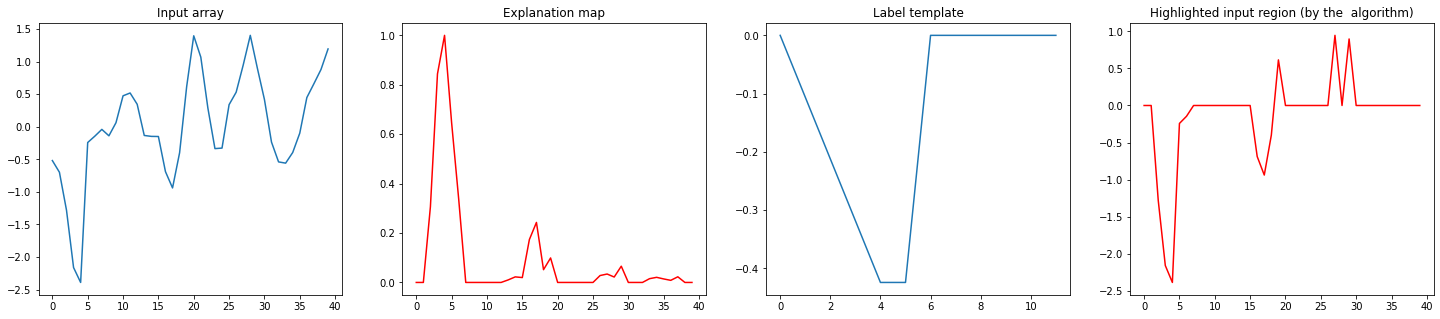

In [47]:
threshold = np.sort(explanation)[-12]

plt.figure(figsize=(25,5))

plt.subplot(1,4,1)
plt.plot(input[0])
plt.title('Input array')

plt.subplot(1,4,2)
plt.plot(explanation, 'r')
plt.title('Explanation map')

plt.subplot(1,4,3)
plt.plot(dataset['templates']['x'][label])
plt.title('Label template')

plt.subplot(1,4,4)
plt.plot((input[0,:,0]*(explanation>threshold)), 'r')
plt.title('Highlighted input region (by the  algorithm)')

# SHAP


In [48]:
#import libraries to handle linear regression and computation of combinations
from sklearn.linear_model import LinearRegression
from math import factorial

#Compute n choose k, used for weighting factors
def comb(n, k):
    return factorial(n) / factorial(k) / factorial(n - k)

#My SHAP function for MNIST1D
def my_shap(inputs, labels, model, index):
  #Identify input being evaluated
  input = inputs[index]
  label = labels[index]
  #Specify Number of features
  M = 40
  #Create arrays to feed into linear regression
  # x is the coalition vector
  x = []
  # y is the prediction based on the coalition vector
  y = []

  
  # create all coalition vectors to be sampled
  for a in range(input.size):
    # initialize coalition vector
    feat = np.zeros(input.size)
    # set one (a-th) feature on
    feat[a] = 1
    # compile coalition vectors including only the ath feature and excluding only the ath feature
    x.append(feat)
    x.append(1 - feat)

  
  # get predictions for all coalition vectors from the model
  for e in range(np.shape(x)[0]):
    # create temporary input vector
    new_input = np.zeros(input.size)
    # fill input vector
    for f in range(input.size):
      # if the feature is included, sample feature from the input being evaluated
      # if the feature is not included (else), average neighbors
      if x[e][f] == 1:
        new_input[f] = input[f]
      else:
        # set edge case to 0, average for rest
        if f == 0 | f == input.size -1:
          new_input[f] = 0
        else:
          new_input[f] = (input[f-1]+input[f+1])/2
    # generate prediction for the new input vector
    pred = model.predict(np.expand_dims(np.expand_dims(new_input, axis=0), axis=-1))
    # compile predictions into array
    y.append(pred)

  # fix dimensions of array to work with linear regression
  y = np.asarray(y)
  y = y[:,:,label]
  
  # create weight vector
  pie = np.zeros(np.shape(x)[0])
  # calculate weights
  for p in range(pie.size):
    z_prime = sum(x[p])
    pie[p] = (M-1) / (z_prime * (M - z_prime) * comb(M, z_prime))

  # find linear regression between predictions and coalition vectors, with weightings
  shap = LinearRegression().fit(x,y,pie)

  # create explanation map
  exmap = shap.coef_.flatten()
  exmap -= np.min(exmap)
  exmap /= np.max(exmap)
  
  return exmap

Text(0.5, 1.0, 'Highlighted input region (by the  algorithm)')

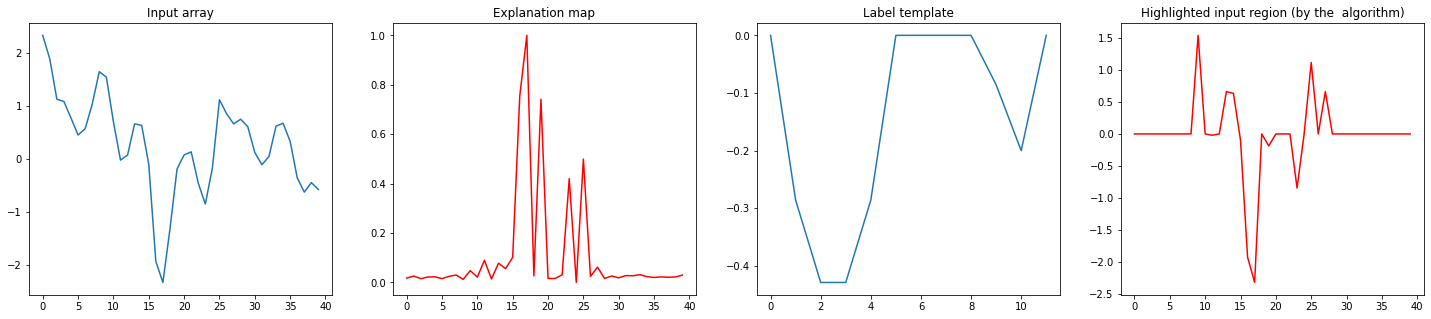

In [49]:
# generate explanation map
explanation = my_shap(x_test, y_test, model, index)
# set threshold
threshold = np.sort(explanation)[-12]

plt.figure(figsize=(25,5))

plt.subplot(1,4,1)
plt.plot(x_test[index])
plt.title('Input array')

plt.subplot(1,4,2)
plt.plot(explanation, 'r')
plt.title('Explanation map')

plt.subplot(1,4,3)
plt.plot(dataset['templates']['x'][y_test[index]])
plt.title('Label template')

plt.subplot(1,4,4)
plt.plot((x_test[index]*(explanation>threshold)), 'r')
plt.title('Highlighted input region (by the  algorithm)')

# Exmaps


Text(0.5, 1.0, 'Highlighted input region by Grad-CAM')

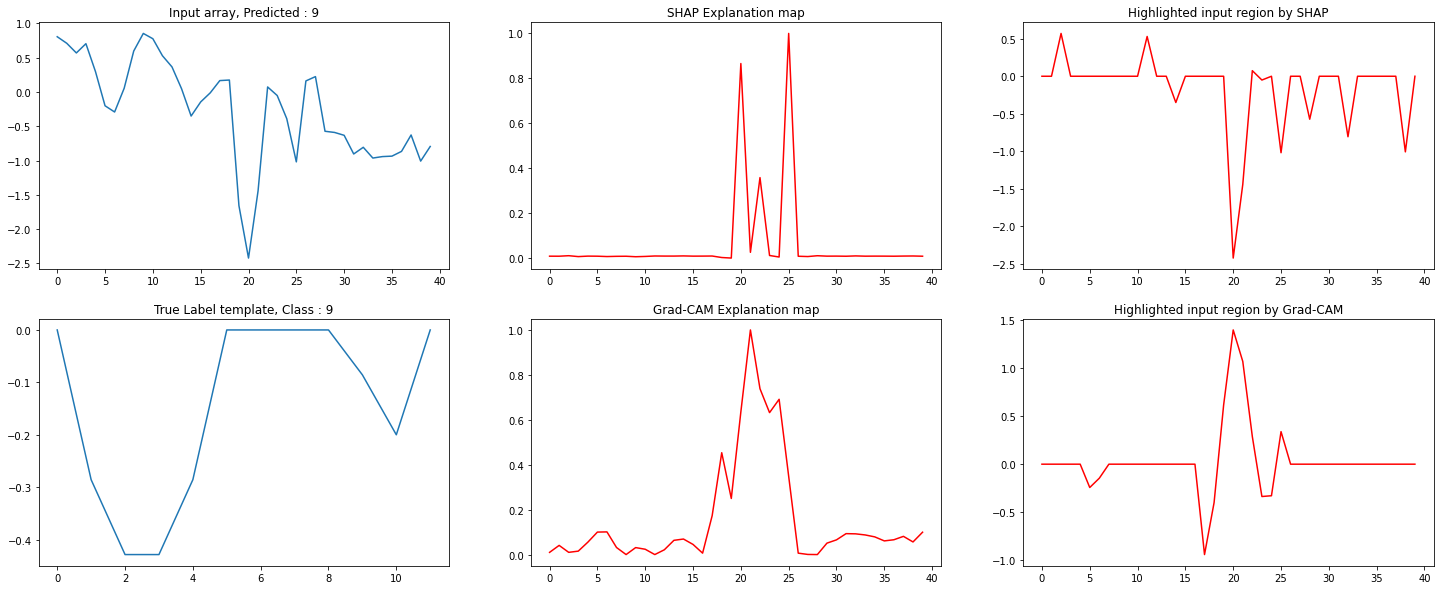

In [66]:
# generate explanation map
index = 874
explanation_SHAP = my_shap(x_test, y_test, model, index)
explanation_GRAD = grad_cam(model, np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1), 'conv1d_2')
# set threshold
threshold_SHAP = np.sort(explanation_SHAP)[-12]
threshold_GRAD = np.sort(explanation_GRAD)[-12]

plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
plt.plot(x_test[index])
plt.title('Input array, Predicted : ' + str(np.argmax(model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy())))

plt.subplot(2,3,2)
plt.plot(explanation_SHAP, 'r')
plt.title('SHAP Explanation map')

plt.subplot(2,3,3)
plt.plot((x_test[index]*(explanation_SHAP>threshold_SHAP)), 'r')
plt.title('Highlighted input region by SHAP')

plt.subplot(2,3,4)
plt.plot(dataset['templates']['x'][y_test[index]])
plt.title('True Label template, Class : ' + str(y_test[index]))

plt.subplot(2,3,5)
plt.plot(explanation_GRAD, 'r')
plt.title('Grad-CAM Explanation map')


plt.subplot(2,3,6)
plt.plot((input[0,:,0]*(explanation_GRAD>threshold_GRAD)), 'r')
plt.title('Highlighted input region by Grad-CAM')

# Quantitative evaluation

In [67]:
def calculate_drop_increase(images, model, exmap, class_index, frac=0.15):
    '''
    inputs:
        images: a 4-D image of size (1 x H x W x 3)
          containing an image in RGB format and of size (H x W)
        model: The base model
        exmap: a given explanation map whose completeness is to be evaluated.
        class_index: The class to whom the explanation map is related to.
        frac: The fraction of top pixels selected.
    returns:v
        a tuple with 4 calculates values:
        (drop, increase, original_pred, eplanation_pred)
        drop (float): drop rate (between 0 and 1)
        increase (boolean): "1" if increase happened
        original_pred: confidence score for original image
        explanation_pred:  confidence score for the selected top pixels of the image.
    '''
    predictions = model.predict(images)
    #print(images.shape)
    # Pre-processing image 
    img=images[0,:,:]
    #img=img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Getting the prediction for image
    Y=predictions[0][class_index]

    
    grad_array=np.reshape(exmap, (-1,))
    array_size=int(grad_array.shape[0]*frac)
    thr=np.flip(sorted(grad_array))[array_size]
    exmap1_msk=(exmap>thr)
    exmap1_thr=np.zeros(shape=(1,40,1))
    exmap1_thr[0,:,0]=img[0,:,0]*exmap1_msk #For using for Grad-CAM++ method
    #exmap1_thr=img*exmap1_msk #for using SISE method
    ex_predictions = model.predict(exmap1_thr)[0]
    O1=ex_predictions[class_index]
    etta=(Y-O1)/(Y+1e-100)
    return (etta*(etta>0), 1*(etta<0), Y, O1)

In [69]:
drop_rate = 0.
increase_rate = 0.
for index in range(1000):
    prediction=model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy()
    #explanation_map = SISE(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1), model, layers=[['conv1d_2']], class_index=np.argmax(prediction[0]), grad_thr=0.)
    #explanation_map = explanation_map.flatten()
    explanation_map = my_shap(x_test, y_test, model, index)
    #explanation_map = grad_cam(model, np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1), 'conv1d_2')
    temp = calculate_drop_increase(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1), model, explanation_map, class_index=np.argmax(prediction[0]), frac=0.3)
    drop_rate += temp[0]
    if temp[1] :
      increase_rate += 1
drop_rate /= 1000
increase_rate /= 1000

print('drop rate', drop_rate)
print('increase rate', increase_rate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7

drop rate 0.42212590478834
increase rate 0.281
